In [546]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [547]:
#read cleaned weather stations to datafarmes
final_stations = pd.read_csv('final_stations.csv')
#removed Sun, Notes, Year columns since it contains NAN values in some stations
final_stations.drop(final_stations[['Unnamed: 0','Sun', 'Notes','Year']], axis=1, inplace= True) 

In [548]:
final_stations.head()

,Stations,Month,Tmax,Tmin,AF,Rain,Tmean
0,aberporth,6.5,12.888889,7.687302,1.115079,78.828175,10.288095
1,armagh,6.5,13.702381,6.274603,2.992063,69.495238,9.988492
2,ballypatrick,6.5,11.864928,6.249531,1.625902,113.057143,9.057229
3,bradford,6.5,13.282143,6.448413,3.027778,74.966270,9.865278
4,braemar,6.5,10.984524,3.012169,8.515873,78.164815,6.998347


In [549]:
# set different features we want to use for clusterings
features = ['Tmean','Rain']
features1 = ['Tmax','Tmin','Tmean', 'AF', 'Rain']
features2 = ['Tmean','AF', 'Rain']
features3 = ['Tmax','Tmin','AF','Rain']
features4 = ['AF','Rain']



In [550]:
#create dataframes containing only of those features
ff = final_stations[features]
ff1 = final_stations[features1]
ff2 = final_stations[features2]
ff3 = final_stations[features3]
ff4 = final_stations[features4]

In [551]:
#call MinMaxScaler
mms = MinMaxScaler()
mms.fit(ff2)

MinMaxScaler()

In [552]:
#transform data
data_transformed2 = mms.transform(ff2)


In [553]:
#alternative for scaling if wished: StandardScaler
#ss = StandardScaler()
#ss.fit(ff)
#data_transformed1 = ss.transform(ff)

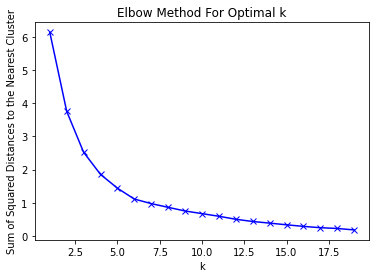

In [554]:
#elbow method to find out best k clusters, feature2= Tmean,AF,Rain
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed2)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances to the Nearest Cluster')
plt.title('Elbow Method For Optimal k')
plt.show()

#Looks like the elbow is about 5, k=5, after 5 the metrics get better at slower rate

In [555]:
#try with package kneed just to confirm that we did correctly
import kneed

In [556]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 20), Sum_of_squared_distances, curve="convex", direction="decreasing")
kl.elbow

#Although result is 5, but based on the scors of hara and silouhette optimal k is 4.

5

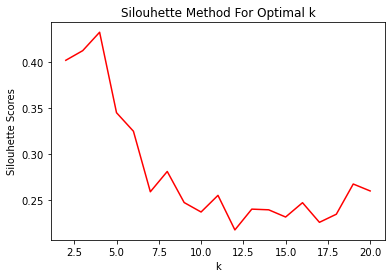

In [557]:
#Silhouette method find out best k clusters, feature2= Tmean,AF,Rain
#try using optimal k numbers with silouhette method, confirming best k is 4
from sklearn.metrics import silhouette_score

sil = []
kmax = 20
K2 = range(2,kmax+1)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in K2:
  kmeans1 = KMeans(n_clusters = k).fit(data_transformed2)
  labels = kmeans1.labels_
  sil.append(silhouette_score(data_transformed2, labels, metric = 'euclidean'))

plt.plot(K2, sil, 'r-')
plt.xlabel('k')
plt.ylabel('Silouhette Scores')
plt.title('Silouhette Method For Optimal k')
plt.show()

In [558]:
# use features2 Tmean, AF and Rain and cluster number k = 4
X4_ff2 = MinMaxScaler().fit_transform(ff2)
kmeans4_ff2 = KMeans(n_clusters=4)
model4_ff2 = kmeans4_ff2.fit(X4_ff2)



In [590]:
#find the silouhette coefficient for 4 clusters to confirm that it is optimal
from sklearn import metrics
labels4_ff2 = kmeans4_ff2.labels_
print('Silhouette score for feature 2 with 4 clusters:', metrics.silhouette_score(X4_ff2, labels4_ff2, metric = 'euclidean'))
print('Harabasz score for feature 2 with 4 clusters:', metrics.calinski_harabasz_score(X4_ff2, labels4_ff2))

Silhouette score for feature 2 with 4 clusters: 0.4323577599885755
Harabasz score for feature 2 with 4 clusters: 25.453469823642575


In [591]:
#find other scores for other suspected clusters
## use features2 Tmean, AF and Rain with k clusters = 5 (as calculated by the elbow and knee method)

X5_ff2 = MinMaxScaler().fit_transform(ff2) 
kmeans5_ff2 = KMeans(n_clusters=5)
model5_ff2 = kmeans5_ff2.fit(X5_ff2)
labels5_ff2 = kmeans5_ff2.labels_

print('Silhouette score for feature 2 with 5 clusters:', metrics.silhouette_score(X5_ff2, labels5_ff2, metric = 'euclidean'))
print('Harabasz score for feature 2 with 5 clusters:', metrics.calinski_harabasz_score(X5_ff2, labels5_ff2))


Silhouette score for feature 2 with 5 clusters: 0.3447210770739467
Harabasz score for feature 2 with 5 clusters: 26.282318030567254


In [592]:
## use features2 Tmean, AF and Rain with k clusters = 6 

X6_ff2 = MinMaxScaler().fit_transform(ff2)
kmeans6_ff2 = KMeans(n_clusters=6)
model6_ff2 = kmeans6_ff2.fit(X6_ff2)
labels6_ff2 = kmeans6_ff2.labels_
print('Silhouette score for feature 2 with 6 clusters:', metrics.silhouette_score(X6_ff2, labels6_ff2, metric = 'euclidean'))
print('Harabasz score for feature 2 with 6 clusters:', metrics.calinski_harabasz_score(X6_ff2, labels6_ff2))

Silhouette score for feature 2 with 6 clusters: 0.3472183549513186
Harabasz score for feature 2 with 6 clusters: 28.24901082071155


In [593]:
## use features2 Tmean, AF and Rain with k clusters = 3 

X3_ff2 = MinMaxScaler().fit_transform(ff2) # use features2 Tmean, AF and Rain.
kmeans3_ff2 = KMeans(n_clusters=3)
model3_ff2 = kmeans3_ff2.fit(X3_ff2)
labels3_ff2 = kmeans3_ff2.labels_
print('Silhouette score for feature 2 with 3 clusters:', metrics.silhouette_score(X3_ff2, labels3_ff2, metric = 'euclidean'))
print('Harabasz score for feature 2 with 3 clusters:', metrics.calinski_harabasz_score(X3_ff2, labels3_ff2))

Silhouette score for feature 2 with 3 clusters: 0.38432226580099066
Harabasz score for feature 2 with 3 clusters: 24.09810271143176


In [563]:
#Now we focus on the k= 4 case with feature2 set

y_kmeans = kmeans.fit_predict(X4_ff2)

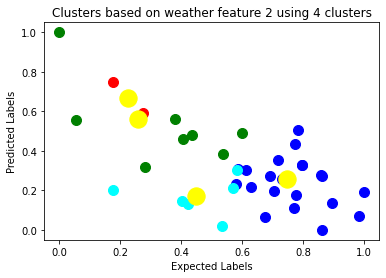

In [577]:
#plot predicted vs the true centers
plt.scatter(X4_ff2[y_kmeans==0, 0], X4_ff2[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X4_ff2[y_kmeans==1, 0], X4_ff2[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X4_ff2[y_kmeans==2, 0], X4_ff2[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X4_ff2[y_kmeans==3, 0], X4_ff2[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')

plt.scatter(kmeans4_ff2.cluster_centers_[:, 0], kmeans4_ff2.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters based on weather feature 2 using 4 clusters')
plt.xlabel('Expected Labels')
plt.ylabel('Predicted Labels')
plt.show()

#I don't think with clusters=4 is good as you see 1 cluster (blue) is good, but the other 3 clusters show some overlaps
# We could try to plot clusters = 2 and see if it can be better



In [565]:
#What happens if we change to clusters = 2,  use features2 Tmean, AF and Rain.

X2 = MinMaxScaler().fit_transform(ff2) 
kmeans2 = KMeans(n_clusters=2,init ='k-means++', max_iter=300, n_init=10,random_state=0)
model2 = kmeans2.fit(X2)
labels2 = kmeans2.labels_
final_stations2 = final_stations.copy()
final_stations2['Clus_km'] = labels2
final_stations2.groupby(by ='Clus_km').count()



,Stations,Month,Tmax,Tmin,AF,Rain,Tmean
Clus_km,,,,,,,
0,12,12,12,12,12,12,12
1,25,25,25,25,25,25,25


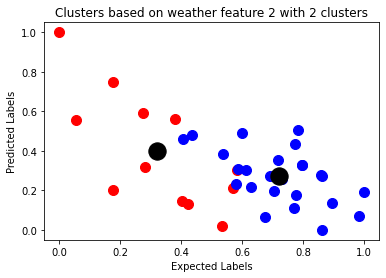

In [566]:
# Try to plot with only 2 clusters with features 2: Tmean,AF and Rain
y_kmeans2 = kmeans2.fit_predict(X2)
#plot predicted vs the true centers with 2 clusters
plt.scatter(X2[y_kmeans2==0, 0], X2[y_kmeans2==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X2[y_kmeans2==1, 0], X2[y_kmeans2==1, 1], s=100, c='blue', label ='Cluster 2')

plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=300, c='black', label = 'Centroids')
plt.title('Clusters based on weather feature 2 with 2 clusters')
plt.xlabel('Expected Labels')
plt.ylabel('Predicted Labels')
plt.show()

# this looks like less overlaps and more distinct clusters

In [581]:
# We want to check the error our clusterings for 4 clusters of features 2:

print('Error of clustering for 4 clusters is:', kmeans4_ff2.inertia_)
# this is low so means model is good?
print('Error of clustering for 2 clusters is:', kmeans2.inertia_)
#higher error so is less accurate for clusterings.

Error of clustering for 4 clusters is: 1.8551251519837892
Error of clustering for 2 clusters is: 3.734546174569406


In [568]:
# ADD a column of kmeans clusters to the main dataframe final_stations. This reflects k clusters = 4
final_stations["Clus_km"] = labels4_ff2


In [569]:
#final_stations['prediction'] = predict


In [576]:
#check how spread is the clusters, looks like more in 1 group (group0)

final_stations.groupby(by ='Clus_km').count()

,Stations,Month,Tmax,Tmin,AF,Rain,Tmean
Clus_km,,,,,,,
0,23,23,23,23,23,23,23
1,2,2,2,2,2,2,2
2,6,6,6,6,6,6,6
3,6,6,6,6,6,6,6


In [575]:
final_stations.head()

,Stations,Month,Tmax,Tmin,AF,Rain,Tmean,Clus_km
0,aberporth,6.5,12.888889,7.687302,1.115079,78.828175,10.288095,0
1,armagh,6.5,13.702381,6.274603,2.992063,69.495238,9.988492,0
2,ballypatrick,6.5,11.864928,6.249531,1.625902,113.057143,9.057229,2
3,bradford,6.5,13.282143,6.448413,3.027778,74.966270,9.865278,0
4,braemar,6.5,10.984524,3.012169,8.515873,78.164815,6.998347,3


In [582]:
#lets try with n_clusters = 5 as suggested by the kneed calculator

X5 = MinMaxScaler().fit_transform(ff2) # use features2 Tmean, AF and Rain.
kmeans5 = KMeans(n_clusters=5)
model5 = kmeans5.fit(X5)
labels5 = kmeans5.labels_
final_stations5 = final_stations.copy()
final_stations5.drop('Clus_km', axis=1, inplace = True)

In [583]:
# Just to check if cluster = 5 will give any more balance in the cluster divisions:

final_stations5['Clus_km5'] = labels5
final_stations5.groupby(by ='Clus_km5').count()

#this still shows unbalanced groups

,Stations,Month,Tmax,Tmin,AF,Rain,Tmean
Clus_km5,,,,,,,
0,2,2,2,2,2,2,2
1,14,14,14,14,14,14,14
2,9,9,9,9,9,9,9
3,6,6,6,6,6,6,6
4,6,6,6,6,6,6,6


In [585]:
# Focus back to final_staions df where cluster numbers = 4 of features 2: Tmean, Rain and AF

final_stations[final_stations['Clus_km'] == 0]

,Stations,Month,Tmax,Tmin,AF,Rain,Tmean,Clus_km
0,aberporth,6.5,12.888889,7.687302,1.115079,78.828175,10.288095,0
1,armagh,6.5,13.702381,6.274603,2.992063,69.495238,9.988492,0
3,bradford,6.5,13.282143,6.448413,3.027778,74.966270,9.865278,0
5,camborne,6.5,13.705556,8.704762,0.607143,88.967460,11.205159,0
6,cambridge,6.5,15.036508,6.726190,3.214286,47.165476,10.881349,0
7,cardiff,6.5,15.085317,7.323413,2.769841,100.413889,11.204365,0
8,chivenor,6.5,14.702850,8.017929,1.680014,79.007143,11.360390,0
11,durham,6.5,13.342063,5.894444,3.642857,58.225794,9.618254,0
12,eastbourne,6.5,14.797222,8.778571,1.162698,66.285714,11.787897,0
14,heathrow,6.5,15.788889,7.955556,2.107143,52.755952,11.872222,0


In [587]:
final_stations[final_stations['Clus_km'] == 1]

,Stations,Month,Tmax,Tmin,AF,Rain,Tmean,Clus_km
9,cwmystwyth,6.125,11.787090,4.873422,5.296086,154.481250,8.330256,1
13,eskdalemuir,6.500,11.564683,4.137302,6.507937,155.123413,7.850992,1


In [588]:
final_stations[final_stations['Clus_km'] == 2]

,Stations,Month,Tmax,Tmin,AF,Rain,Tmean,Clus_km
2,ballypatrick,6.5,11.864928,6.249531,1.625902,113.057143,9.057229,2
10,dunstaffnage,6.5,12.875505,6.669781,2.273713,142.266835,9.772643,2
16,lerwick,6.5,9.943254,5.781349,2.210317,105.632857,7.862302,2
23,paisley,6.5,13.257937,6.438095,3.023810,103.805952,9.848016,2
29,stornoway,6.5,11.647475,6.279545,1.772727,101.993975,8.963510,2
31,tiree,6.5,12.022222,7.190476,0.781746,105.744444,9.606349,2


In [589]:
final_stations[final_stations['Clus_km'] == 3]

,Stations,Month,Tmax,Tmin,AF,Rain,Tmean,Clus_km
4,braemar,6.5,10.984524,3.012169,8.515873,78.164815,6.998347,3
17,leuchars,6.5,12.811905,5.416270,4.400794,61.498413,9.114087,3
20,nairn,6.5,12.735830,5.231291,4.246465,56.581898,8.983561,3
21,newtonrigg,6.5,12.699603,4.989683,5.035714,83.561905,8.844643,3
28,southampton,2.0,10.833333,3.700000,5.000000,43.166667,7.266667,3
35,wickairport,6.5,11.191667,5.532143,3.111111,65.296825,8.361905,3


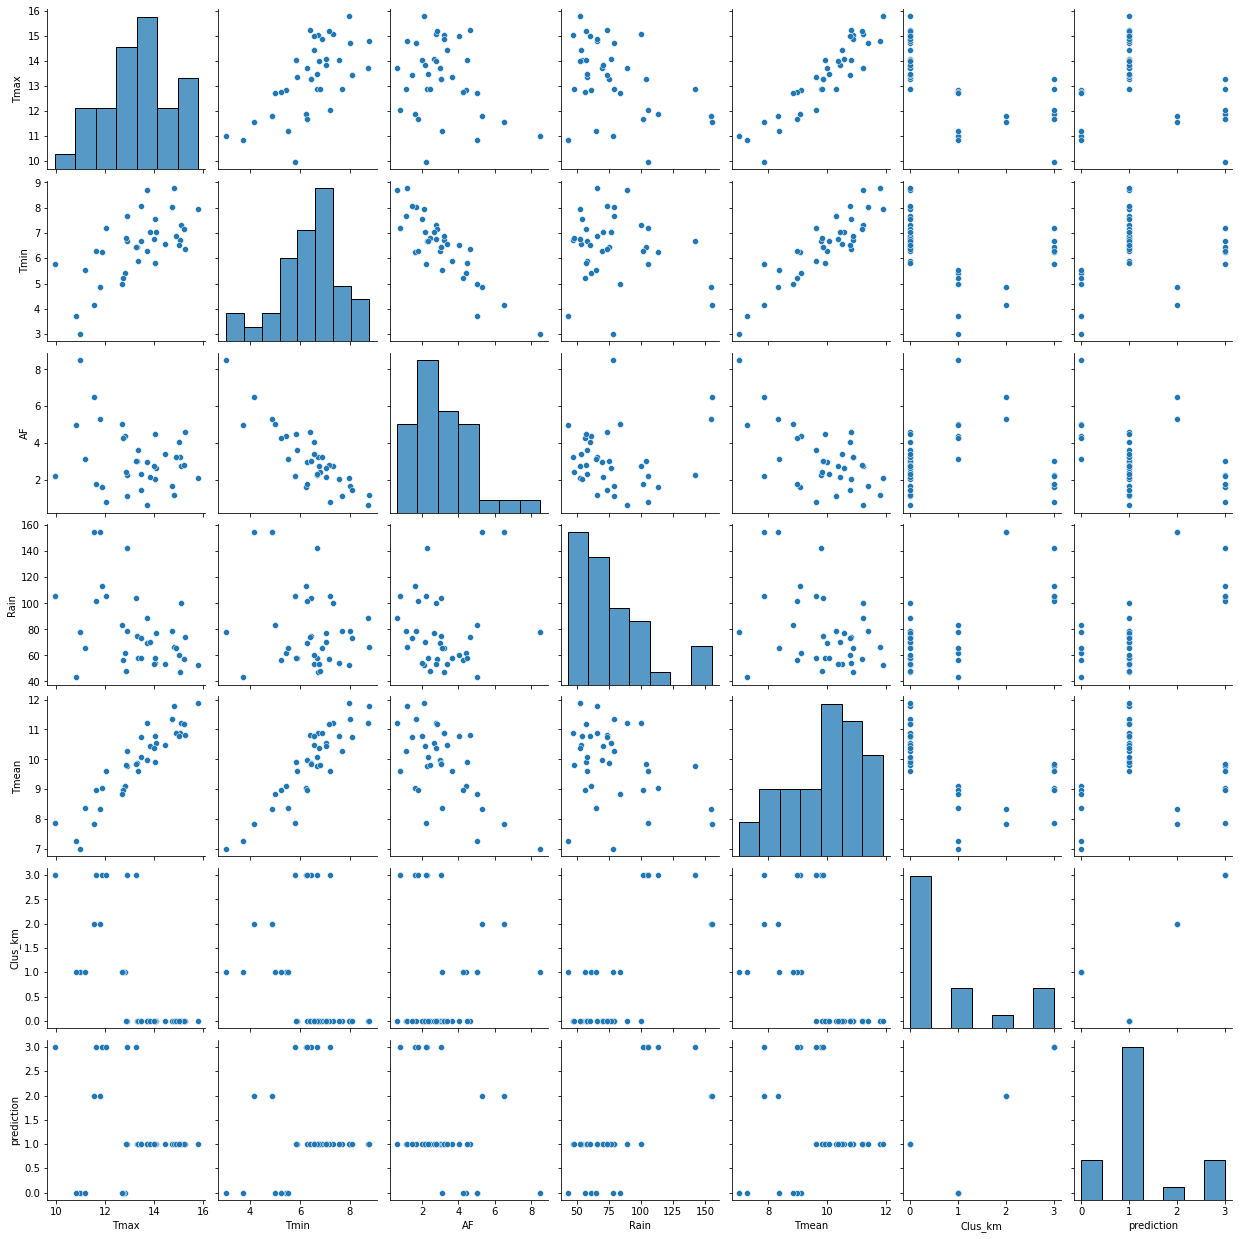

In [509]:
# I want to plot to see if there is any obvious pattern/relationship between different variables 
import seaborn as sns
sns.pairplot(final_stations) 

In [510]:
# break the df to smaller df with interested variables:

short_stations = final_stations[['Tmax','Tmin','Tmean','AF','Rain','Clus_km']]

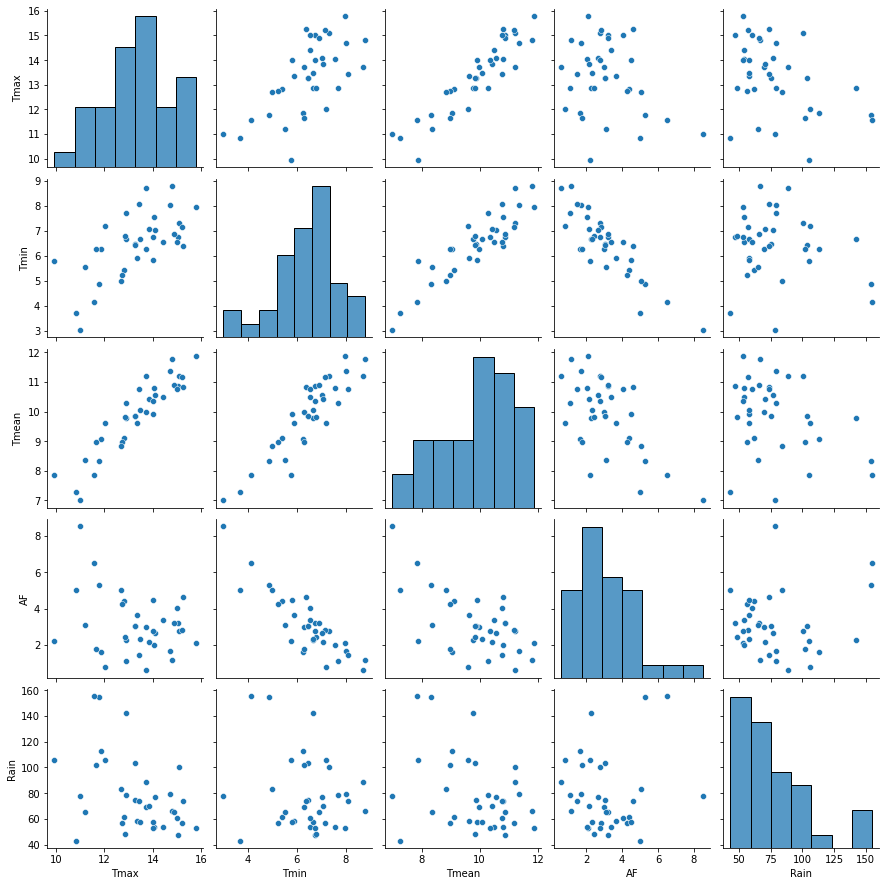

In [511]:
#Create dataframe without cluster_km (clustering groups) and investigate the variables relationship
short_stations1 = final_stations[['Tmax','Tmin','Tmean','AF','Rain']]
sns.pairplot(short_stations1)

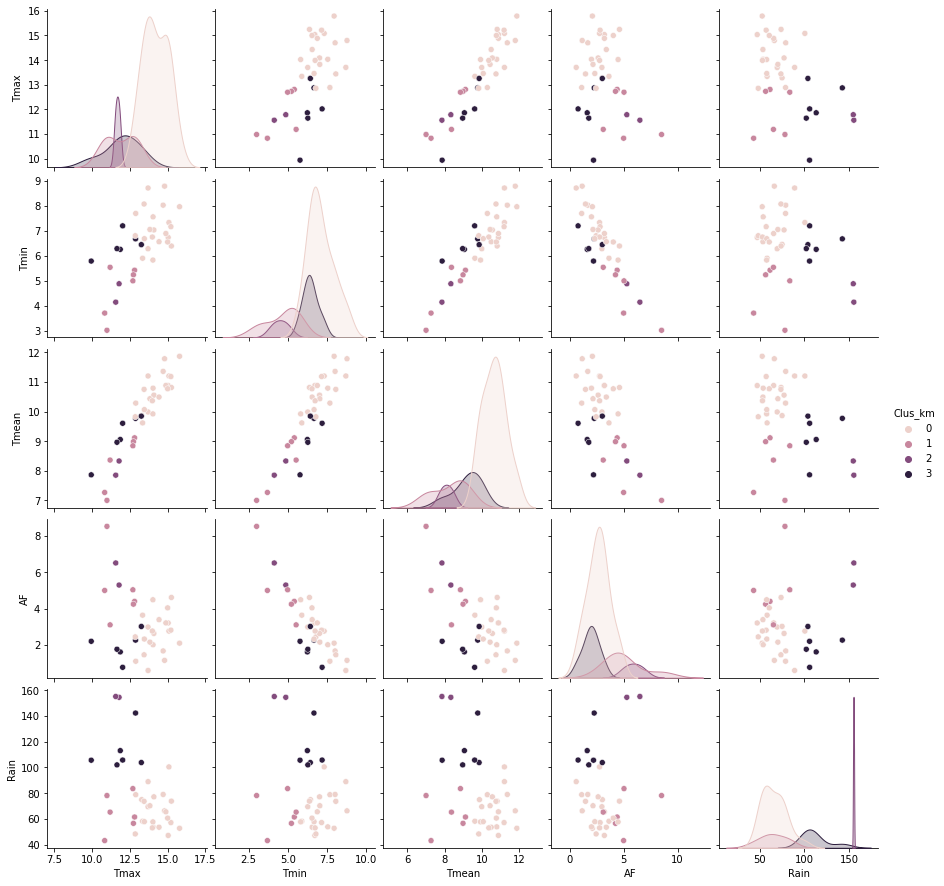

In [512]:
# Plot to see if there is any obvious pattern based on clusters groups
sns.pairplot(short_stations, hue = 'Clus_km')

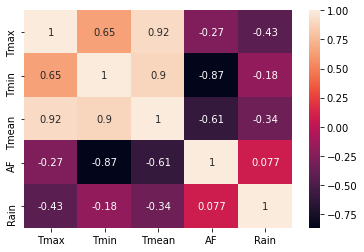

In [399]:
#finding correlation between the different variables using heatmap
corrMatrix = short_stations1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [513]:
#check how many iterations 
kmeans4_ff2.n_iter_

6

In [515]:
# Some summary information
centroids4 = kmeans4_ff2.cluster_centers_
error = kmeans4_ff2.inertia_

print ("The total error of the clustering is: ", error)
print ('\nCluster labels')
print(labels4_ff2)
print ('\n Cluster Centroids')
print (centroids4)

The total error of the clustering is:  1.8551251519837892

Cluster labels
[0 0 3 0 1 0 0 0 0 2 3 0 0 2 0 0 3 1 0 0 1 1 0 3 0 0 0 0 1 3 0 3 0 0 0 1 0]

 Cluster Centroids
[[0.74920138 0.25721411 0.20422997]
 [0.25917531 0.56197601 0.19244117]
 [0.22410857 0.66949665 0.99713209]
 [0.44864945 0.16954594 0.61556691]]
